<a href="https://colab.research.google.com/github/itskrati/AssetSquare/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
data = pd.read_excel("/content/employee_burnout_analysis-AI 2.xlsx")

In [ ]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [ ]:
data["Company Type"].unique()

array(['Service', 'Product'], dtype=object)

In [ ]:
data.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [ ]:
data.shape

(22750, 9)

In [ ]:
y =

In [ ]:
y = data['Burn Rate']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
X_train = data.drop('Burn Rate',axis=1)

In [ ]:
x_train, x_test, y_test = train_test_split(x,y, train_size=0.7, shuffle=True, random_state=1)

NameError: name 'x' is not defined

In [ ]:
x_train, x_test, y_test = train_test_split(x,y, train_size=0.7, shuffle=True, random_state=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index =x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), index=x_train.index, columns=x_test.columns)

NameError: name 'x' is not defined

In [ ]:
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Burn Rate               1.000000
Name: Burn Rate, dtype: float64


In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


In [ ]:
data = data.dropna()

In [ ]:
data.shape


(18590, 9)

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

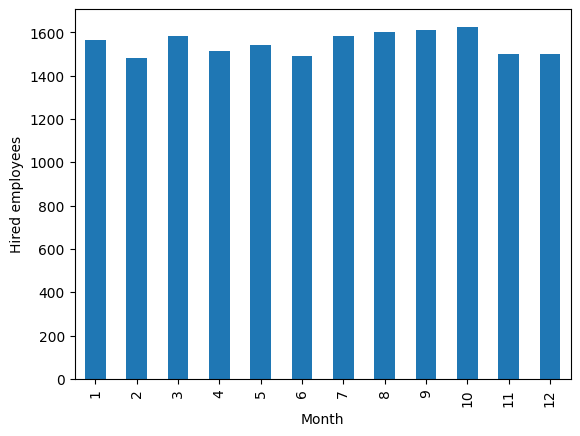

In [ ]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar", xlabel="Month",ylabel="Hired employees")

In [ ]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

<ipython-input-22-23d2b80066cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days


,Days
0,273
1,334
3,307
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,9


In [ ]:
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:]

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389
Burn Rate,1.000000
Days,0.000309


In [ ]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [ ]:
data.head()

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,Male,Service,Yes,1,2.0,5.0,0.36
3,fffe32003400380032003900,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,Male,Product,Yes,2,4.0,3.6,0.29


In [ ]:
cat_columns = data.

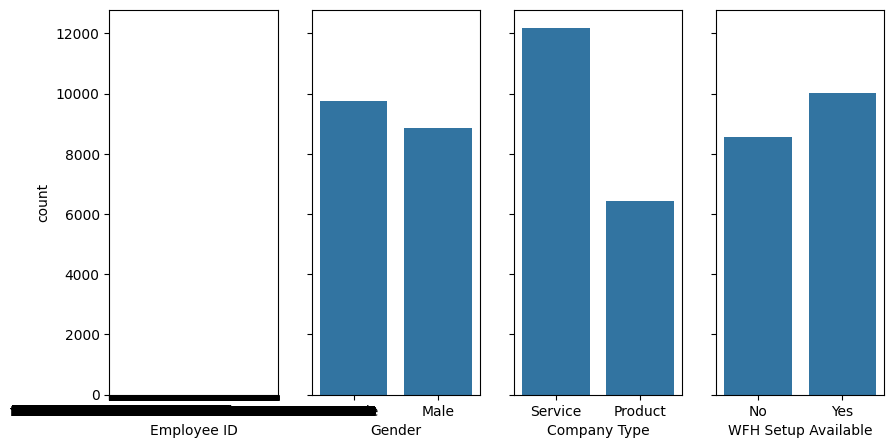

In [ ]:
cat_columns = data.select_dtypes(object).columns
fig , ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10,5))
for i, c in enumerate(cat_columns):
  sns.countplot(x=c, data=data, ax=ax[i])
plt.show()


In [ ]:
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
  data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available', 'Gender'], drop_first=True)
  data.head()
  encoded_columns = data.columns
else:
  print("Error: one or more of the specified column are not present in the Dataframe.")
  print(data.columns)

In [ ]:
data


,Employee ID,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,fffe32003000360033003200,2,3.0,3.8,0.16,True,False,False
1,fffe3700360033003500,1,2.0,5.0,0.36,True,True,True
3,fffe32003400380032003900,1,1.0,2.6,0.20,True,True,True
4,fffe31003900340031003600,3,7.0,6.9,0.52,True,False,False
5,fffe3300350037003500,2,4.0,3.6,0.29,False,True,True
...,...,...,...,...,...,...,...,...
22743,fffe3300390030003600,1,3.0,6.0,0.48,False,True,False
22744,fffe32003500370033003200,3,7.0,6.2,0.54,False,False,True
22746,fffe33003000350031003800,3,6.0,6.7,0.59,False,True,False
22748,fffe33003300320036003900,2,5.0,5.9,0.52,True,False,False


In [ ]:
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.7, shuffle=True, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

ValueError: could not convert string to float: 'fffe32003000320032003100'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def check_missing_values(df):
    missing = df.isnull().sum()
    return missing[missing > 0]

In [ ]:
print("Linear Regression Model Performance Metrics:\n")
y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-Squared:", r2)

Linear Regression Model Performance Metrics:



NameError: name 'linear_regression_model' is not defined

In [ ]:
missing_values = check_missing_values(data) # Assuming 'data' is your DataFrame
print("Missing Values:")
print(missing_values)

Missing Values:
Series([], dtype: int64)


In [ ]:
data['Resource Allocation'] = data['Resource Allocation'].fillna(data['Resource Allocation'].median())


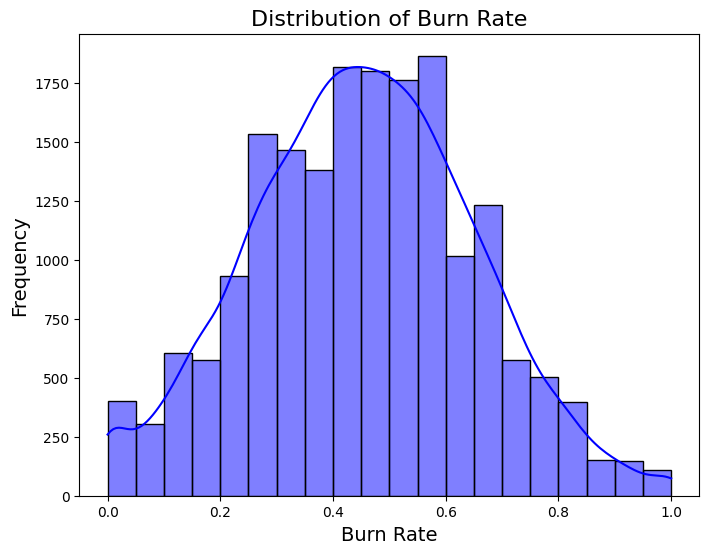

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Burn Rate'], kde=True, bins=20, color='blue')
plt.title('Distribution of Burn Rate', fontsize=16)
plt.xlabel('Burn Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Burn Rate', data=data, palette='Set2')
plt.title('Burn Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Burn Rate', fontsize=14)
plt.show()

ValueError: Could not interpret value `Gender` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

<ipython-input-42-179f1f131892>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender_Male', y='Burn Rate', data=data, palette='Set2')


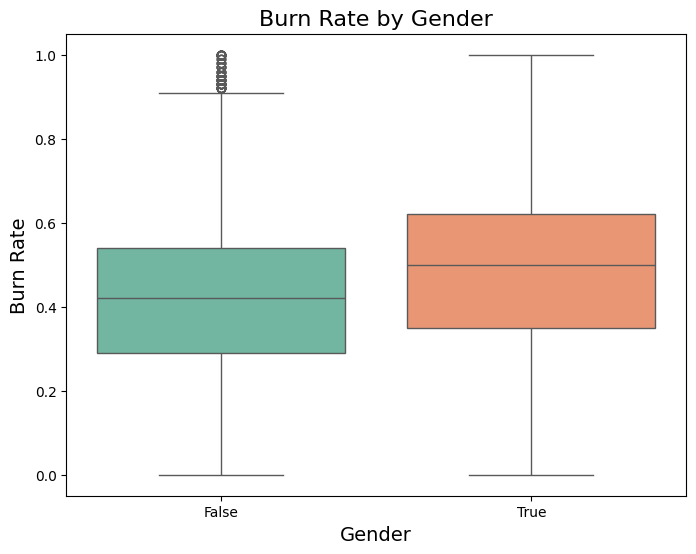

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender_Male', y='Burn Rate', data=data, palette='Set2')
plt.title('Burn Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)  # Adjust x-axis label if needed
plt.ylabel('Burn Rate', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Company Type', y='Burn Rate', data=data, palette='Set3')
plt.title('Burn Rate by Company Type', fontsize=16)
plt.xlabel('Company Type', fontsize=14)
plt.ylabel('Burn Rate', fontsize=14)
plt.show()


ValueError: Could not interpret value `Company Type` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

<ipython-input-44-390149392ed7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company Type_Service', y='Burn Rate', data=data, palette='Set3')


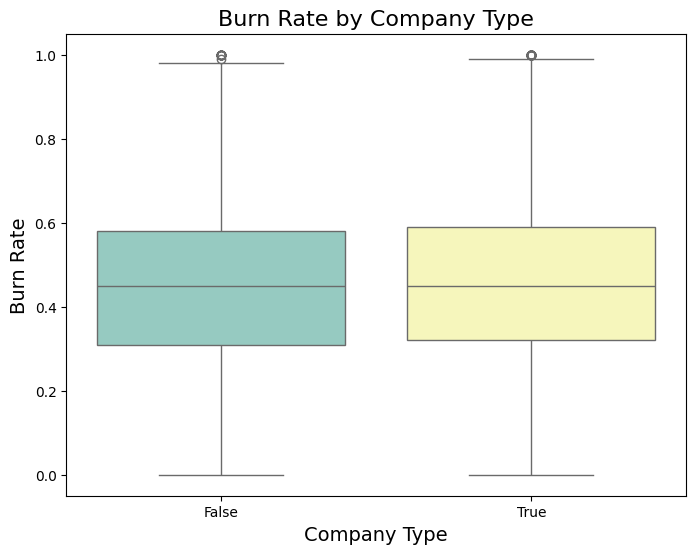

In [ ]:
plt.figure(figsize=(8, 6))
# Assuming 'Company Type' was one-hot encoded into 'Company Type_Service' and 'Company Type_Product'
sns.boxplot(x='Company Type_Service', y='Burn Rate', data=data, palette='Set3')
plt.title('Burn Rate by Company Type', fontsize=16)
plt.xlabel('Company Type', fontsize=14)  # Adjust x-axis label if needed
plt.ylabel('Burn Rate', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


ValueError: could not convert string to float: 'fffe32003000360033003200'

<Figure size 1000x800 with 0 Axes>

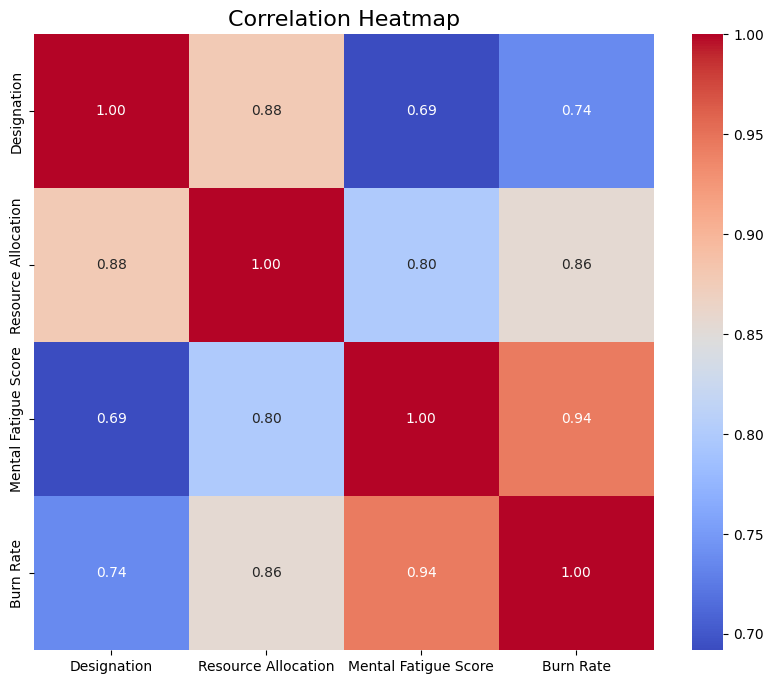

In [ ]:

data_numeric = data.drop(columns=['Employee ID'])


numeric_cols = data.select_dtypes(include=['number']).columns
data_numeric = data[numeric_cols]
correlation = data_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mental Fatigue Score', y='Burn Rate', data=data, hue='WFH Setup Available', palette='cool')
plt.title('Burn Rate vs Mental Fatigue Score', fontsize=16)
plt.xlabel('Mental Fatigue Score', fontsize=14)
plt.ylabel('Burn Rate', fontsize=14)
plt.legend(title='WFH Setup Available')
plt.show()


ValueError: Could not interpret value `WFH Setup Available` for `hue`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6))
# Assuming 'WFH Setup Available' was one-hot encoded to 'WFH Setup Available_Yes'
# Use 'WFH Setup Available_Yes' or 'WFH Setup Available_No' for hue
sns.scatterplot(x='Mental

SyntaxError: unterminated string literal (detected at line 4) (<ipython-input-49-68fcef9dcc2c>, line 4)

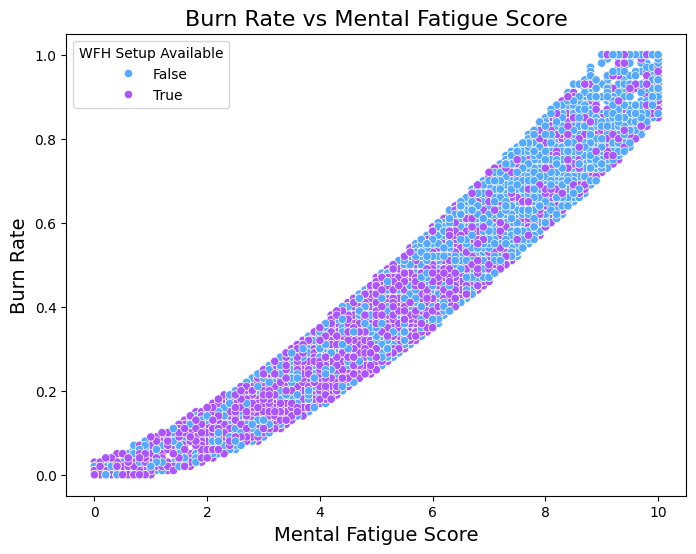

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='Mental Fatigue Score', y='Burn Rate', data=data, hue='WFH Setup Available_Yes', palette='cool')
plt.title('Burn Rate vs Mental Fatigue Score', fontsize=16)
plt.xlabel('Mental Fatigue Score', fontsize=14)
plt.ylabel('Burn Rate', fontsize=14)
plt.legend(title='WFH Setup Available')
plt.show()

In [ ]:
print("Key Observations:")
print("1. Distribution of burnout rates provides an overview of stress levels.")
print("2. Gender-wise and company-type comparisons reveal any demographic trends.")
print("3. Correlation matrix highlights key relationships among variables.")
print("4. Burn rate strongly correlates with mental fatigue, indicating stress factors.")

Key Observations:
1. Distribution of burnout rates provides an overview of stress levels.
2. Gender-wise and company-type comparisons reveal any demographic trends.
3. Correlation matrix highlights key relationships among variables.
4. Burn rate strongly correlates with mental fatigue, indicating stress factors.
